# Assignment wk 3

### How does linear regression work?

Linear regression is predicting the relationship (the outcome) of a variable known as the dependent variable using only one independent variable; so between to variables. 

The general formula is:    - 
$y=b0+b1X+E$    - Where y is the outcome, b0 is the slope, b1 is the intercept, the X is the independent variable and e is the "error/difference" 

### Pre-processing

First I start with understanding the structure of the data. So after I import all the necessary libraries and read the .csv file, I'll use .info() to get a the top 5 of the dataset.

In [57]:
import seaborn as sns
import sklearn as sk #this is the most popular library for statistics and machine learning
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df = pd.read_csv('data_mashable.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             24999 non-null  int64  
 1   url                            24999 non-null  object 
 2   n_tokens_title                 24999 non-null  int64  
 3   n_tokens_content               24999 non-null  int64  
 4   num_imgs                       24999 non-null  int64  
 5   num_videos                     24999 non-null  int64  
 6   average_token_length           24999 non-null  float64
 7   data_channel_is_lifestyle      24999 non-null  int64  
 8   data_channel_is_entertainment  24999 non-null  int64  
 9   data_channel_is_bus            24999 non-null  int64  
 10  data_channel_is_socmed         24999 non-null  int64  
 11  data_channel_is_tech           24999 non-null  int64  
 12  data_channel_is_world          24999 non-null 

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375000,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000000,6000,3.778151
5,6,http://mashable.com/2014/04/24/amazing-lebron-...,13,303,2,0,4.970297,0,0,0,...,0,0,0,0,0.394298,0.048684,0.000000,0.000000,1200,3.079181
6,7,http://mashable.com/2013/06/22/social-media-we...,6,544,11,0,4.617647,0,0,0,...,0,1,0,1,0.439512,0.267391,0.500000,0.500000,3500,3.544068
7,8,http://mashable.com/2013/07/09/russian-deletes...,12,223,1,0,4.399103,0,0,0,...,0,0,0,0,0.394792,0.053125,0.218182,0.145455,1500,3.176091
8,9,http://mashable.com/2013/03/07/3d-printed-skull/,8,438,1,0,5.027397,0,0,0,...,0,0,0,0,0.479187,0.166913,0.500000,0.200000,3100,3.491362
9,10,http://mashable.com/2013/11/16/xbox-one-vs-pla...,11,389,1,1,4.642674,0,0,1,...,0,1,0,1,0.417229,0.183895,0.166667,0.000000,27300,4.436163


Then I'll have a look which 5 variables I want to use. Therefore I need to look at the correlation with 'shares_log' and find the variables with the highest 'score'.

In [58]:
df.corr().sort_values(by='shares_log', ascending=False) #Ascending makes it easier to look for the strongest correlation

,id,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
shares_log,-0.003900,-0.012247,0.032897,0.085575,0.037147,-0.031730,0.036926,-0.080967,-0.033469,0.085516,...,0.006309,0.072644,0.071864,0.105919,0.093021,0.053199,0.055161,0.050216,0.483322,1.000000
shares,-0.000407,0.011404,0.009625,0.037395,0.025691,-0.007094,0.003820,-0.013069,-0.004352,0.004336,...,-0.002876,0.011820,0.004585,0.011887,0.042049,0.008655,0.019736,0.009655,1.000000,0.483322
is_weekend,0.009324,-0.002890,0.044572,0.053317,-0.016556,-0.005759,0.041413,-0.005749,-0.051383,-0.001594,...,-0.159362,0.660882,0.702154,1.000000,0.014754,0.023717,0.021418,0.034256,0.011887,0.105919
global_subjectivity,0.004155,-0.036779,0.093424,0.069931,0.089470,0.523029,0.054790,0.027306,-0.046447,0.026838,...,0.012810,0.004367,0.015468,0.014754,1.000000,0.315314,0.125244,0.033078,0.042049,0.093021
num_imgs,-0.001707,0.000777,0.357047,1.000000,-0.073084,0.022387,0.001179,0.111108,-0.144599,-0.008554,...,-0.009555,0.027809,0.044483,0.053317,0.069931,0.014196,0.056100,0.046353,0.037395,0.085575
data_channel_is_socmed,0.011212,-0.089559,0.035805,-0.008554,-0.014793,0.021908,-0.061806,-0.118710,-0.113122,1.000000,...,0.000117,0.010063,-0.011666,-0.001594,0.026838,0.058003,-0.013620,0.024063,0.004336,0.085516
weekday_is_saturday,0.004893,-0.018488,0.030457,0.027809,-0.009846,-0.019250,0.021400,-0.015870,-0.044736,0.010063,...,-0.105320,1.000000,-0.070326,0.660882,0.004367,0.017369,0.002299,0.028072,0.011820,0.072644
weekday_is_sunday,0.007751,0.013699,0.030348,0.044483,-0.012664,0.010608,0.034742,0.007414,-0.025853,-0.011666,...,-0.111897,-0.070326,1.000000,0.702154,0.015468,0.015045,0.026287,0.018899,0.004585,0.071864
title_subjectivity,-0.008384,0.075907,0.004364,0.056100,0.058613,-0.037501,-0.005399,0.045334,-0.040481,-0.013620,...,0.004438,0.002299,0.026287,0.021418,0.125244,0.026624,1.000000,0.238629,0.019736,0.055161
global_sentiment_polarity,-0.002630,-0.059906,0.014327,0.014196,-0.027871,0.146979,0.077873,-0.044559,0.063373,0.058003,...,-0.012807,0.017369,0.015045,0.023717,0.315314,1.000000,0.026624,0.238290,0.008655,0.053199


In [59]:
#creating an X and Y. The independent variable represents X, and y represents the target variable in a simple linear regression model.
y = df['shares_log']
X = df[['is_weekend','global_subjectivity','num_imgs','data_channel_is_socmed', 'weekday_is_saturday']] #the 5 variables
X.index = df['url']

X.head()

,is_weekend,global_subjectivity,num_imgs,data_channel_is_socmed,weekday_is_saturday
url,,,,,
http://mashable.com/2013/10/29/ashton-kutcher-lenovo/,0,0.439379,12,0,0
http://mashable.com/2014/09/08/mashies-sept-19-deadline/,0,0.300454,6,0,0
http://mashable.com/2013/02/01/hello-kitty-rocket/,0,0.575486,0,0,0
http://mashable.com/2014/02/06/add-us-on-snapchat/,0,0.327220,2,0,0
http://mashable.com/2014/01/07/lindsey-vonn-withdraws-sochi-olympics-knee-injury/,0,0.507709,18,0,0


In [60]:
#We need to split the variables into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, and store it into variables
X_train.head() #The train data

,is_weekend,global_subjectivity,num_imgs,data_channel_is_socmed,weekday_is_saturday
url,,,,,
http://mashable.com/2013/02/03/puppy-bowl-online/,1,0.451711,0,0,0
http://mashable.com/2014/09/11/bridesmaid-lost-dress-sydney/,0,0.476976,9,0,0
http://mashable.com/2013/03/08/facebook-acquires-storylane/,0,0.488495,1,0,0
http://mashable.com/2014/04/29/yahoo-mail-app-redesign/,0,0.545746,23,0,0
http://mashable.com/2013/08/28/chef-knife-moves-video/,0,0.507042,13,0,0


From this point I got confused with what the next steps would be. Unfortunately I had limited time to ask classmates and have another look at it. 
I mainly got confused with how we should coefficients into the predicting model, and then the difference with the test model and train model. Therefore I tried also to visualize it, but the outcome clearly isn't right so I couldn't really add notes or have an analysis on it. 

In [61]:
lm = LinearRegression() #create the model
lm.fit(X_train, y_train) #train the model

df['shares_log_p'] = lm.predict(X) #generate the predictions and add them to the dataframe
df['predicted_shares_log'] = df['shares_log'] - df['shares_log_p'] #get the residuals by subtracting the prediction from the actual views

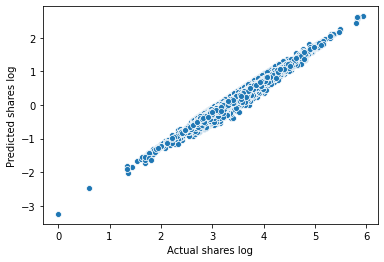

In [62]:
sns.scatterplot(x='shares_log',y='predicted_shares_log',data=df)
plt.xlabel('Actual shares log')
plt.ylabel('Predicted shares log')
plt.show()

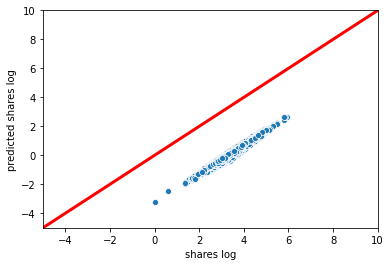

In [63]:
sns.scatterplot(x='shares_log',y='predicted_shares_log',data=df)
plt.xlim(-5, 10) #This sets the x-axis limits to (0, 5e10 = 5000000000)
plt.ylim(-5, 10) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.plot([-5, 5e10], [-5, 5e10], color='red', lw=3) #the width of that line) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('shares log')
plt.ylabel('predicted shares log')
plt.show()

In [64]:
r2_score(df['shares_log'], df['predicted_shares_log']) #this gives the model fit (R2) for the Y and predicted Y

-62.619854717049414

In [65]:
math.sqrt(mean_squared_error(df['shares_log'], df['predicted_shares_log'])) #this gives the model fit (R2) for the Y and predicted Y

3.2547705279340575